**RUDRARAM ARAVIND        -------- DEMAND FORECASTING FOR ECOMMERCE**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

Mounted at /content/drive/


In [3]:

file_path = '/content/drive/My Drive/Ecommerce_Dataset.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

print(df.head())

df.shape


   index        Order ID        Date     Status Fulfilment Sales Channel  \
0      0  EwLn-660487-64  2016-01-01  delivered     amazon     Amazon.in   
1      1  TZMj-824219-48  2016-01-01    shipped     amazon     Amazon.in   
2      2  BuNO-411578-15  2016-01-01  delivered     amazon     Amazon.in   
3      3  afUz-387784-08  2016-01-01  delivered     amazon     Amazon.in   
4      4  KopZ-097535-13  2016-01-01    shipped     amazon     Amazon.in   

  ship-service-level   Style       SKU Category  ... currency   Amount  \
0           Standard  Sports  SKU-8356    kurta  ...      INR   716.29   
1           Standard  Casual  SKU-9974    kurta  ...      INR  2226.70   
2           Standard   Party  SKU-7990   Blouse  ...      INR  3397.78   
3           Standard  Ethnic  SKU-3017    Saree  ...      INR   708.86   
4           Standard  Ethnic  SKU-6915   Bottom  ...      INR  2054.37   

          ship-state   ship-city  ship-postal-code ship-country  \
0              DELHI    Kakinad

(128978, 23)

In [4]:

df.fillna({'promotion-ids': 'None'}, inplace=True)
df.dropna(subset=['Order ID', 'Date'], inplace=True)



print(df.head())

   index        Order ID        Date     Status Fulfilment Sales Channel  \
0      0  EwLn-660487-64  2016-01-01  delivered     amazon     Amazon.in   
1      1  TZMj-824219-48  2016-01-01    shipped     amazon     Amazon.in   
2      2  BuNO-411578-15  2016-01-01  delivered     amazon     Amazon.in   
3      3  afUz-387784-08  2016-01-01  delivered     amazon     Amazon.in   
4      4  KopZ-097535-13  2016-01-01    shipped     amazon     Amazon.in   

  ship-service-level   Style       SKU Category  ... currency   Amount  \
0           Standard  Sports  SKU-8356    kurta  ...      INR   716.29   
1           Standard  Casual  SKU-9974    kurta  ...      INR  2226.70   
2           Standard   Party  SKU-7990   Blouse  ...      INR  3397.78   
3           Standard  Ethnic  SKU-3017    Saree  ...      INR   708.86   
4           Standard  Ethnic  SKU-6915   Bottom  ...      INR  2054.37   

          ship-state   ship-city  ship-postal-code ship-country  \
0              DELHI    Kakinad

In [5]:

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce').fillna(0)
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce').fillna(0)

In [6]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-state,ship-city,ship-postal-code,ship-country,promotion-ids,fulfilled-by,facebook Impression,google clicks
0,0,EwLn-660487-64,2016-01-01,delivered,amazon,Amazon.in,Standard,Sports,SKU-8356,kurta,...,INR,716.29,DELHI,Kakinada,344791,IN,Amazon PLCC,easy ship,474,159
1,1,TZMj-824219-48,2016-01-01,shipped,amazon,Amazon.in,Standard,Casual,SKU-9974,kurta,...,INR,2226.70,WEST BENGAL,Ghaziabad,861551,IN,Amazon PLCC,easy ship,199,220
2,2,BuNO-411578-15,2016-01-01,delivered,amazon,Amazon.in,Standard,Party,SKU-7990,Blouse,...,INR,3397.78,UTTAR PRADESH,Vijayawada,161288,IN,IN CORE FREE SHIPPING,easy ship,525,232
3,3,afUz-387784-08,2016-01-01,delivered,amazon,Amazon.in,Standard,Ethnic,SKU-3017,Saree,...,INR,708.86,MIZORAM,Amravati,857835,IN,IN CORE FREE SHIPPING,easy ship,40,374
4,4,KopZ-097535-13,2016-01-01,shipped,amazon,Amazon.in,Standard,Ethnic,SKU-6915,Bottom,...,INR,2054.37,ARUNACHAL PRADESH,Ghaziabad,528031,IN,Coupon,easy ship,584,172


In [7]:
df.shape


(128978, 23)

Visualizations


In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
unique_dates = df['Date'].unique()

print("Unique Dates:")
print(unique_dates)

Unique Dates:
<DatetimeArray>
['2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-03 00:00:00',
 '2016-01-04 00:00:00', '2016-01-05 00:00:00', '2016-01-06 00:00:00',
 '2016-01-07 00:00:00', '2016-01-08 00:00:00', '2016-01-09 00:00:00',
 '2016-01-10 00:00:00',
 ...
 '2024-04-17 00:00:00', '2024-04-18 00:00:00', '2024-04-19 00:00:00',
 '2024-04-20 00:00:00', '2024-04-21 00:00:00', '2024-04-22 00:00:00',
 '2024-04-23 00:00:00', '2024-04-24 00:00:00', '2024-04-25 00:00:00',
 '2024-04-26 00:00:00']
Length: 3039, dtype: datetime64[ns]


In [9]:
num_nan_time = df['Date'].isna().sum()

print(f"Number of rows with NaN in date: {num_nan_time}")


Number of rows with NaN in date: 0


In [10]:
date_range = df['Date'].min(), df['Date'].max()
print("\nDate Range:")
print(f"From {date_range[0]} to {date_range[1]}")

num_unique_dates = len(unique_dates)
print(f"\nNumber of Unique Dates: {num_unique_dates}")


Date Range:
From 2016-01-01 00:00:00 to 2024-04-26 00:00:00

Number of Unique Dates: 3039


In [11]:

threshold_days = 30

date_min = df['Date'].min()
date_max = df['Date'].max()

outlier_dates = df[(df['Date'] < (date_min - pd.Timedelta(days=threshold_days))) |
                   (df['Date'] > (date_max + pd.Timedelta(days=threshold_days)))]

if not outlier_dates.empty:
    print("Potential Outlier Dates:")
    print(outlier_dates['date'])
else:
    print("No potential outlier dates found.")
import matplotlib.pyplot as plt
import seaborn as sns

No potential outlier dates found.


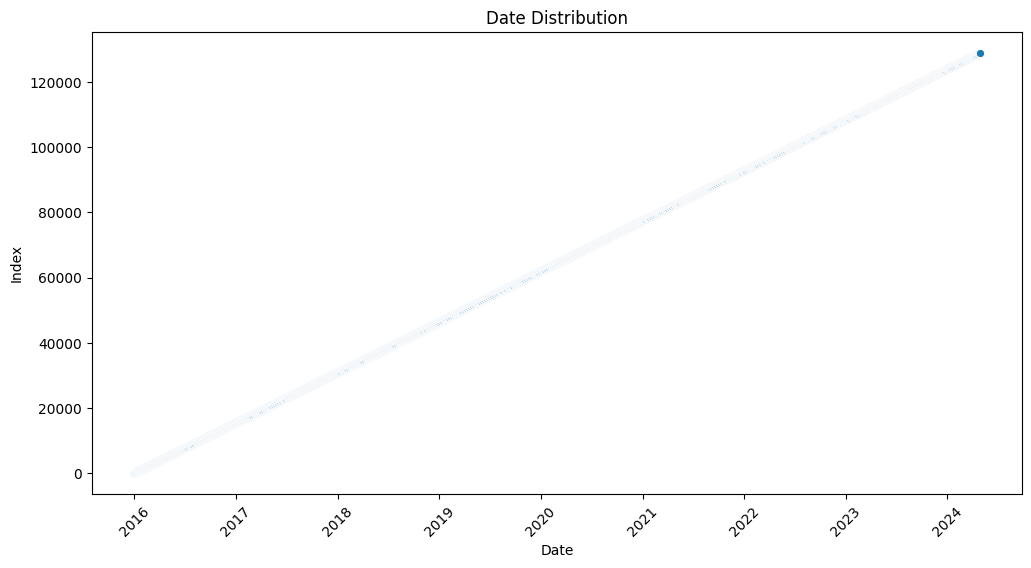

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y=df.index, marker='o')
plt.title('Date Distribution')
plt.xlabel('Date')
plt.ylabel('Index')
plt.xticks(rotation=45)
plt.show()


In [13]:
unique_statuses = df['Status'].unique()

print("Unique Status Values:")
print(unique_statuses)

num_unique_statuses = len(unique_statuses)
print(f"\nNumber of Unique Status Values: {num_unique_statuses}")


Unique Status Values:
['delivered' 'shipped' 'returned']

Number of Unique Status Values: 3


In [14]:
unique_Fullfilment = df['Fulfilment'].unique()

print("Unique Fulfilment Values:")
print(unique_Fullfilment)

num_unique_Fullfilment = len(unique_Fullfilment)
print(f"\nNumber of Unique Status Values: {num_unique_Fullfilment}")


Unique Fulfilment Values:
['amazon' 'merchant']

Number of Unique Status Values: 2


In [15]:
unique_Sales_Channel = df['Sales Channel'].unique()

print("Unique Sales Channel Values:")
print(unique_Sales_Channel)

num_unique_Sales_Channel = len(unique_Sales_Channel)
print(f"\nNumber of Unique Status Values: {num_unique_Sales_Channel}")


Unique Sales Channel Values:
['Amazon.in' 'Non-Amazon']

Number of Unique Status Values: 2


In [16]:
sales_channel_counts = df['Sales Channel'].value_counts()

print("Sales Channel Counts:")
print(sales_channel_counts)

print("\nSales Channel Counts (Formatted):")
for channel, count in sales_channel_counts.items():
    print(f"{channel}: {count}")

Sales Channel Counts:
Sales Channel
Amazon.in     122331
Non-Amazon      6647
Name: count, dtype: int64

Sales Channel Counts (Formatted):
Amazon.in: 122331
Non-Amazon: 6647


In [17]:
df = df[df['Sales Channel'].str.strip().eq('Amazon.in')]

print(f"DataFrame shape after keeping only 'Amazon' Sales Channel rows: {df.shape}")

unique_sales_channel = df['Sales Channel'].unique()
print("\nUnique Sales Channel Values after filtering:")
print(unique_sales_channel)

DataFrame shape after keeping only 'Amazon' Sales Channel rows: (122331, 23)

Unique Sales Channel Values after filtering:
['Amazon.in']


In [18]:
df = df.drop('Sales Channel', axis=1)

print(df.head())


   index        Order ID       Date     Status Fulfilment ship-service-level  \
0      0  EwLn-660487-64 2016-01-01  delivered     amazon           Standard   
1      1  TZMj-824219-48 2016-01-01    shipped     amazon           Standard   
2      2  BuNO-411578-15 2016-01-01  delivered     amazon           Standard   
3      3  afUz-387784-08 2016-01-01  delivered     amazon           Standard   
4      4  KopZ-097535-13 2016-01-01    shipped     amazon           Standard   

    Style       SKU Category Size  ... currency   Amount         ship-state  \
0  Sports  SKU-8356    kurta    L  ...      INR   716.29              DELHI   
1  Casual  SKU-9974    kurta    M  ...      INR  2226.70        WEST BENGAL   
2   Party  SKU-7990   Blouse   XL  ...      INR  3397.78      UTTAR PRADESH   
3  Ethnic  SKU-3017    Saree    S  ...      INR   708.86            MIZORAM   
4  Ethnic  SKU-6915   Bottom    M  ...      INR  2054.37  ARUNACHAL PRADESH   

    ship-city ship-postal-code ship-country 

In [19]:
unique_ship_service = df['ship-service-level'].unique()

print("Unique ship-service-level Values:")
print(unique_ship_service)

num_unique_ship_service = len(unique_ship_service)
print(f"\nNumber of Unique Status Values: {num_unique_ship_service}")


Unique ship-service-level Values:
['Standard' 'Expedited']

Number of Unique Status Values: 2


In [20]:
unique_Category = df['Category'].unique()

print("Unique Category Values:")
print(unique_Category)

num_unique_Category = len(unique_Category)
print(f"\nNumber of Unique Status Values: {num_unique_Category}")


Unique Category Values:
['kurta' 'Blouse' 'Saree' 'Bottom' 'Ethnic Dress' 'Dupatta' 'Top' 'Set'
 'Western Dress']

Number of Unique Status Values: 9


In [21]:
unique_size = df['Size'].unique()

print("Unique size Values:")
print(unique_size)

num_unique_size = len(unique_size)
print(f"\nNumber of Unique Status Values: {num_unique_size}")


Unique size Values:
['L' 'M' 'XL' 'S' 'XXL' 'Free' 'XS' '5XL' '3XL' '6XL' '4XL']

Number of Unique Status Values: 11


In [22]:
unique_currency = df['currency'].unique()

print("Unique Currencies Values:")
print(unique_currency)

num_unique_currency = len(unique_currency)
print(f"\nNumber of Unique Status Values: {num_unique_currency}")


Unique Currencies Values:
['INR']

Number of Unique Status Values: 1


In [23]:
nan_currency_count = df['currency'].isna().sum()

print(f"Number of rows with NaN in 'currency' column: {nan_currency_count}")


Number of rows with NaN in 'currency' column: 0


In [24]:
df = df.dropna(subset=['currency'])

print(f"DataFrame shape after removing rows with NaN in 'currency': {df.shape}")

unique_currency = df['currency'].unique()
print("\nUnique Currency Values after filtering:")
print(unique_currency)

print(df.shape)

DataFrame shape after removing rows with NaN in 'currency': (122331, 22)

Unique Currency Values after filtering:
['INR']
(122331, 22)


In [25]:
df = df.drop('currency', axis=1)

print(f"Columns after dropping 'currency': {df.columns}")


Columns after dropping 'currency': Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Qty',
       'Amount', 'ship-state', 'ship-city', 'ship-postal-code', 'ship-country',
       'promotion-ids', 'fulfilled-by', 'facebook Impression',
       'google clicks'],
      dtype='object')


In [26]:
unique_ship_state = df['ship-state'].unique()

print("Unique Status Values:")
print(unique_ship_state)

num_unique_ship_state = len(unique_ship_state)
print(f"\nNumber of Unique Status Values: {num_unique_ship_state}")


Unique Status Values:
['DELHI' 'WEST BENGAL' 'UTTAR PRADESH' 'MIZORAM' 'ARUNACHAL PRADESH'
 'TAMIL NADU' 'ODISHA' 'ANDHRA PRADESH' 'PUNJAB' 'GUJARAT' 'CHANDIGARH'
 'ASSAM' 'MADHYA PRADESH' 'KARNATAKA' 'BIHAR' 'NAGALAND' 'JHARKHAND'
 'UTTARAKHAND' 'HARYANA' 'TRIPURA' 'TELANGANA' 'DADRA AND NAGAR'
 'MEGHALAYA' 'RAJASTHAN' 'MANIPUR' 'CHHATTISGARH' 'ANDAMAN & NICOBAR'
 'HIMACHAL PRADESH' 'PUDUCHERRY' 'MAHARASHTRA' 'GOA' 'LAKSHADWEEP'
 'KERALA' 'SIKKIM' 'LADAKH' 'JAMMU & KASHMIR']

Number of Unique Status Values: 36


In [27]:
nan_ship_state_count = df['ship-state'].isna().sum()

print(f"Number of rows with NaN in 'ship-state' column: {nan_ship_state_count}")


Number of rows with NaN in 'ship-state' column: 0


EXAMPle

In [28]:
unique_ship_country = df['ship-country'].unique()

print("Unique Status Values:")
print(unique_ship_country)

num_unique_ship_country = len(unique_ship_country)
print(f"\nNumber of Unique Status Values: {num_unique_ship_country}")


Unique Status Values:
['IN']

Number of Unique Status Values: 1


In [29]:
nan_ship_country_count = df['ship-country'].isna().sum()
print(f"Number of rows with NaN in 'ship-country': {nan_ship_country_count}")

Number of rows with NaN in 'ship-country': 0


In [30]:
df = df.dropna(subset=['ship-country'])

In [31]:
nan_ship_country_count = df['ship-country'].isna().sum()
print(f"Number of rows with NaN in 'ship-country': {nan_ship_country_count}")

Number of rows with NaN in 'ship-country': 0


In [32]:
df = df.drop('ship-country', axis=1)

print(df.head())


   index        Order ID       Date     Status Fulfilment ship-service-level  \
0      0  EwLn-660487-64 2016-01-01  delivered     amazon           Standard   
1      1  TZMj-824219-48 2016-01-01    shipped     amazon           Standard   
2      2  BuNO-411578-15 2016-01-01  delivered     amazon           Standard   
3      3  afUz-387784-08 2016-01-01  delivered     amazon           Standard   
4      4  KopZ-097535-13 2016-01-01    shipped     amazon           Standard   

    Style       SKU Category Size          ASIN  Qty   Amount  \
0  Sports  SKU-8356    kurta    L  lkIX82753EzG    7   716.29   
1  Casual  SKU-9974    kurta    M  AnnT30557Ivr    6  2226.70   
2   Party  SKU-7990   Blouse   XL  DapH43935IHg    2  3397.78   
3  Ethnic  SKU-3017    Saree    S  RcdR43116deL    7   708.86   
4  Ethnic  SKU-6915   Bottom    M  Tuba36962lbk    4  2054.37   

          ship-state   ship-city  ship-postal-code          promotion-ids  \
0              DELHI    Kakinada            344791 

In [33]:
unique_Fullfilled_by = df['fulfilled-by'].unique()

print("Unique Status Values:")
print(unique_Fullfilled_by)

num_unique_Fullfiled_by = len(unique_Fullfilled_by)
print(f"\nNumber of Unique Status Values: {num_unique_Fullfiled_by}")


Unique Status Values:
['easy ship']

Number of Unique Status Values: 1


In [34]:
df = df.drop('fulfilled-by', axis=1)

In [35]:

unique_promotion = df['promotion-ids'].unique()

print("Unique Status Values:")
print(unique_promotion)

num_unique_promotion = len(unique_promotion)
print(f"\nNumber of Unique Status Values: {num_unique_promotion}")


Unique Status Values:
['Amazon PLCC' 'IN CORE FREE SHIPPING' 'Coupon' 'Duplicated']

Number of Unique Status Values: 4


In [36]:
num_none_promotion = (df['promotion-ids'] == 'None').sum()

print(f"Number of rows with 'None' in 'promotion-ids': {num_none_promotion}")

Number of rows with 'None' in 'promotion-ids': 0


Dropping


In [37]:
df = df.drop('ship-postal-code', axis=1)

print(df.head())


   index        Order ID       Date     Status Fulfilment ship-service-level  \
0      0  EwLn-660487-64 2016-01-01  delivered     amazon           Standard   
1      1  TZMj-824219-48 2016-01-01    shipped     amazon           Standard   
2      2  BuNO-411578-15 2016-01-01  delivered     amazon           Standard   
3      3  afUz-387784-08 2016-01-01  delivered     amazon           Standard   
4      4  KopZ-097535-13 2016-01-01    shipped     amazon           Standard   

    Style       SKU Category Size          ASIN  Qty   Amount  \
0  Sports  SKU-8356    kurta    L  lkIX82753EzG    7   716.29   
1  Casual  SKU-9974    kurta    M  AnnT30557Ivr    6  2226.70   
2   Party  SKU-7990   Blouse   XL  DapH43935IHg    2  3397.78   
3  Ethnic  SKU-3017    Saree    S  RcdR43116deL    7   708.86   
4  Ethnic  SKU-6915   Bottom    M  Tuba36962lbk    4  2054.37   

          ship-state   ship-city          promotion-ids  facebook Impression  \
0              DELHI    Kakinada            Amaz

In [38]:
df = df.drop('ship-city', axis=1)

print(df.head())


   index        Order ID       Date     Status Fulfilment ship-service-level  \
0      0  EwLn-660487-64 2016-01-01  delivered     amazon           Standard   
1      1  TZMj-824219-48 2016-01-01    shipped     amazon           Standard   
2      2  BuNO-411578-15 2016-01-01  delivered     amazon           Standard   
3      3  afUz-387784-08 2016-01-01  delivered     amazon           Standard   
4      4  KopZ-097535-13 2016-01-01    shipped     amazon           Standard   

    Style       SKU Category Size          ASIN  Qty   Amount  \
0  Sports  SKU-8356    kurta    L  lkIX82753EzG    7   716.29   
1  Casual  SKU-9974    kurta    M  AnnT30557Ivr    6  2226.70   
2   Party  SKU-7990   Blouse   XL  DapH43935IHg    2  3397.78   
3  Ethnic  SKU-3017    Saree    S  RcdR43116deL    7   708.86   
4  Ethnic  SKU-6915   Bottom    M  Tuba36962lbk    4  2054.37   

          ship-state          promotion-ids  facebook Impression  \
0              DELHI            Amazon PLCC                 

In [39]:
df = df.drop('Order ID', axis=1)

print(df.head())


   index       Date     Status Fulfilment ship-service-level   Style  \
0      0 2016-01-01  delivered     amazon           Standard  Sports   
1      1 2016-01-01    shipped     amazon           Standard  Casual   
2      2 2016-01-01  delivered     amazon           Standard   Party   
3      3 2016-01-01  delivered     amazon           Standard  Ethnic   
4      4 2016-01-01    shipped     amazon           Standard  Ethnic   

        SKU Category Size          ASIN  Qty   Amount         ship-state  \
0  SKU-8356    kurta    L  lkIX82753EzG    7   716.29              DELHI   
1  SKU-9974    kurta    M  AnnT30557Ivr    6  2226.70        WEST BENGAL   
2  SKU-7990   Blouse   XL  DapH43935IHg    2  3397.78      UTTAR PRADESH   
3  SKU-3017    Saree    S  RcdR43116deL    7   708.86            MIZORAM   
4  SKU-6915   Bottom    M  Tuba36962lbk    4  2054.37  ARUNACHAL PRADESH   

           promotion-ids  facebook Impression  google clicks  
0            Amazon PLCC                  474  

In [40]:
df = df.drop('Style', axis=1)

print(df.head())


   index       Date     Status Fulfilment ship-service-level       SKU  \
0      0 2016-01-01  delivered     amazon           Standard  SKU-8356   
1      1 2016-01-01    shipped     amazon           Standard  SKU-9974   
2      2 2016-01-01  delivered     amazon           Standard  SKU-7990   
3      3 2016-01-01  delivered     amazon           Standard  SKU-3017   
4      4 2016-01-01    shipped     amazon           Standard  SKU-6915   

  Category Size          ASIN  Qty   Amount         ship-state  \
0    kurta    L  lkIX82753EzG    7   716.29              DELHI   
1    kurta    M  AnnT30557Ivr    6  2226.70        WEST BENGAL   
2   Blouse   XL  DapH43935IHg    2  3397.78      UTTAR PRADESH   
3    Saree    S  RcdR43116deL    7   708.86            MIZORAM   
4   Bottom    M  Tuba36962lbk    4  2054.37  ARUNACHAL PRADESH   

           promotion-ids  facebook Impression  google clicks  
0            Amazon PLCC                  474            159  
1            Amazon PLCC        

In [41]:
df = df.drop('index', axis=1)

print(df.head())

        Date     Status Fulfilment ship-service-level       SKU Category Size  \
0 2016-01-01  delivered     amazon           Standard  SKU-8356    kurta    L   
1 2016-01-01    shipped     amazon           Standard  SKU-9974    kurta    M   
2 2016-01-01  delivered     amazon           Standard  SKU-7990   Blouse   XL   
3 2016-01-01  delivered     amazon           Standard  SKU-3017    Saree    S   
4 2016-01-01    shipped     amazon           Standard  SKU-6915   Bottom    M   

           ASIN  Qty   Amount         ship-state          promotion-ids  \
0  lkIX82753EzG    7   716.29              DELHI            Amazon PLCC   
1  AnnT30557Ivr    6  2226.70        WEST BENGAL            Amazon PLCC   
2  DapH43935IHg    2  3397.78      UTTAR PRADESH  IN CORE FREE SHIPPING   
3  RcdR43116deL    7   708.86            MIZORAM  IN CORE FREE SHIPPING   
4  Tuba36962lbk    4  2054.37  ARUNACHAL PRADESH                 Coupon   

   facebook Impression  google clicks  
0                  474

In [42]:
df = df.drop('ASIN', axis=1)

print(df.head())


        Date     Status Fulfilment ship-service-level       SKU Category Size  \
0 2016-01-01  delivered     amazon           Standard  SKU-8356    kurta    L   
1 2016-01-01    shipped     amazon           Standard  SKU-9974    kurta    M   
2 2016-01-01  delivered     amazon           Standard  SKU-7990   Blouse   XL   
3 2016-01-01  delivered     amazon           Standard  SKU-3017    Saree    S   
4 2016-01-01    shipped     amazon           Standard  SKU-6915   Bottom    M   

   Qty   Amount         ship-state          promotion-ids  \
0    7   716.29              DELHI            Amazon PLCC   
1    6  2226.70        WEST BENGAL            Amazon PLCC   
2    2  3397.78      UTTAR PRADESH  IN CORE FREE SHIPPING   
3    7   708.86            MIZORAM  IN CORE FREE SHIPPING   
4    4  2054.37  ARUNACHAL PRADESH                 Coupon   

   facebook Impression  google clicks  
0                  474            159  
1                  199            220  
2                  525    

In [43]:
df.shape


(122331, 13)

In [44]:
print(df.describe())

missing_values = df.isna().sum()
print("\nMissing Values:\n", missing_values)

print("\nData Info:")
print(df.info())



                                Date            Qty         Amount  \
count                         122331  122331.000000  122331.000000   
mean   2020-02-29 11:05:07.673443328       5.503200    2600.595792   
min              2016-01-01 00:00:00       1.000000     200.040000   
25%              2018-02-02 00:00:00       3.000000    1399.380000   
50%              2020-02-28 00:00:00       6.000000    2603.850000   
75%              2022-04-03 00:00:00       8.000000    3797.285000   
max              2024-04-26 00:00:00      10.000000    4999.970000   
std                              NaN       2.873529    1385.135359   

       facebook Impression  google clicks  
count        122331.000000  122331.000000  
mean            499.749892     250.701433  
min               0.000000       0.000000  
25%             249.000000     125.000000  
50%             500.000000     251.000000  
75%             749.000000     376.000000  
max            1000.000000     500.000000  
std             2

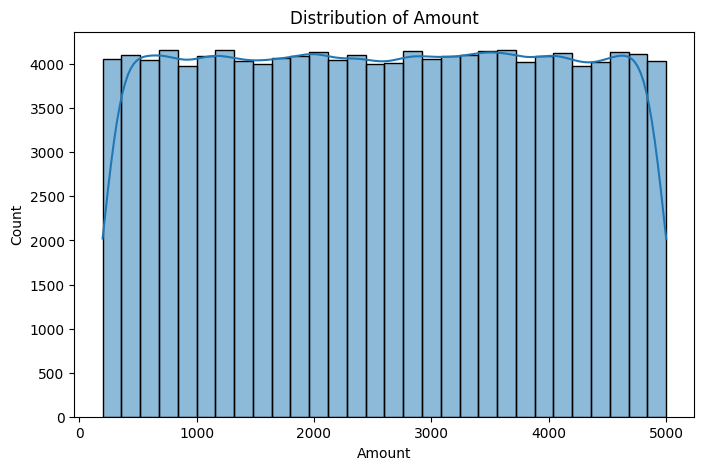

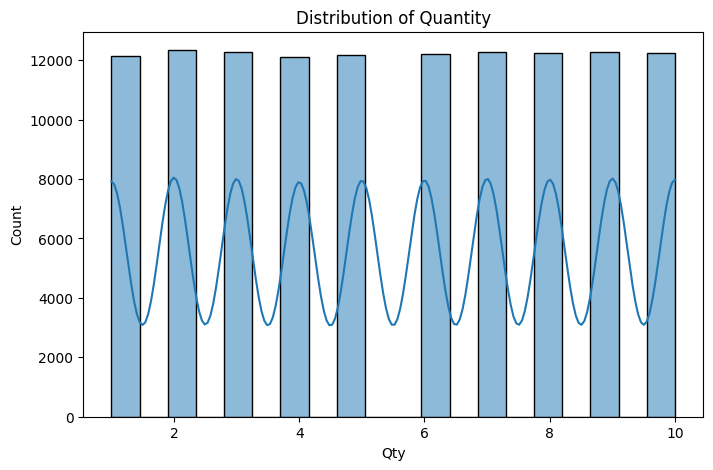

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Amount'
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], kde=True, bins=30)
plt.title('Distribution of Amount')
plt.show()

# Distribution of 'Qty'
plt.figure(figsize=(8, 5))
sns.histplot(df['Qty'], kde=True, bins=20)
plt.title('Distribution of Quantity')
plt.show()


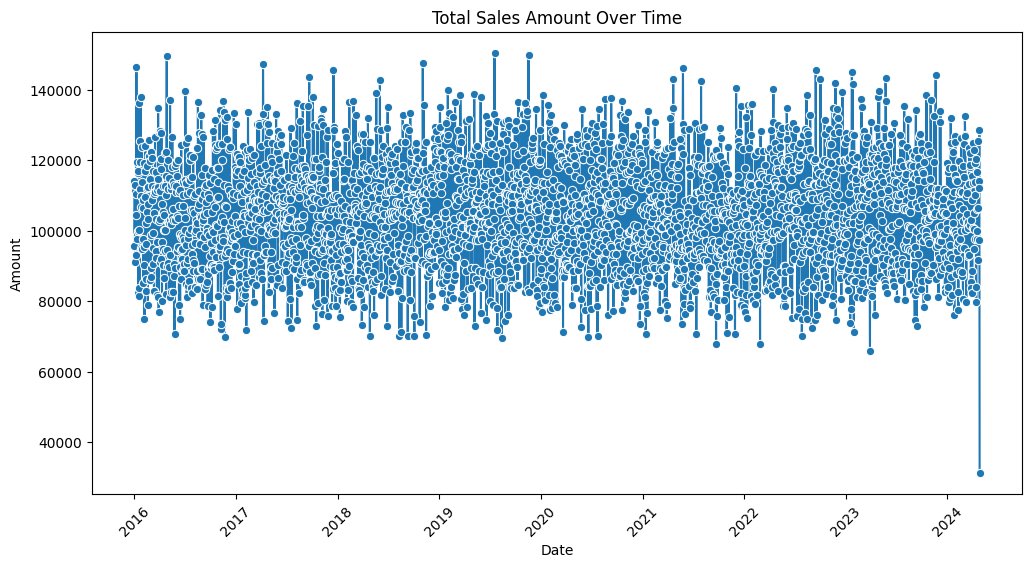

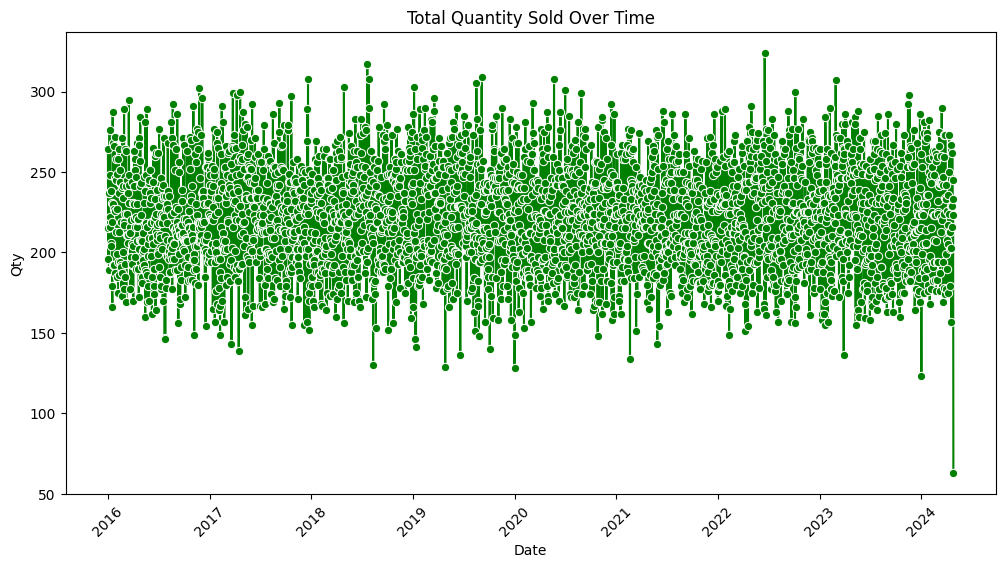

In [46]:
# Sales over time
df_grouped_date = df.groupby('Date')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_date, x='Date', y='Amount', marker='o')
plt.title('Total Sales Amount Over Time')
plt.xticks(rotation=45)
plt.show()

# Quantity sold over time
df_grouped_qty = df.groupby('Date')['Qty'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_qty, x='Date', y='Qty', marker='o', color='green')
plt.title('Total Quantity Sold Over Time')
plt.xticks(rotation=45)
plt.show()


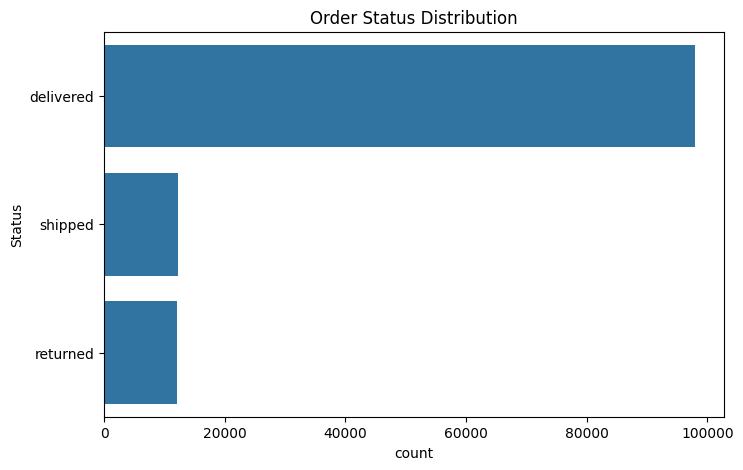

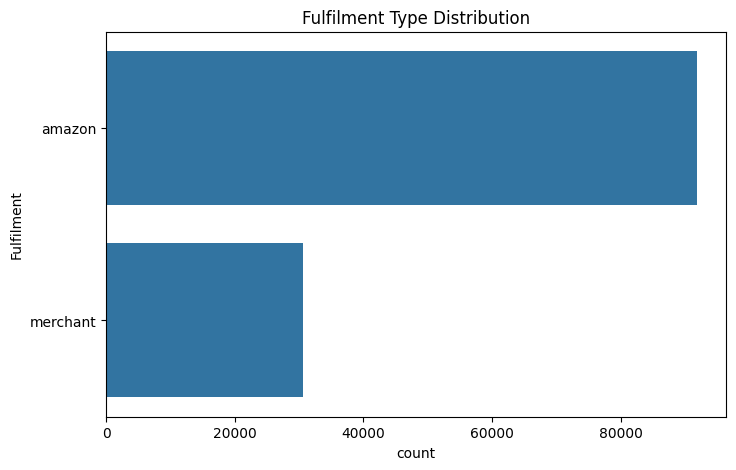

In [47]:
# Status distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Status', order=df['Status'].value_counts().index)
plt.title('Order Status Distribution')
plt.show()

# Fulfilment type distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Fulfilment', order=df['Fulfilment'].value_counts().index)
plt.title('Fulfilment Type Distribution')
plt.show()




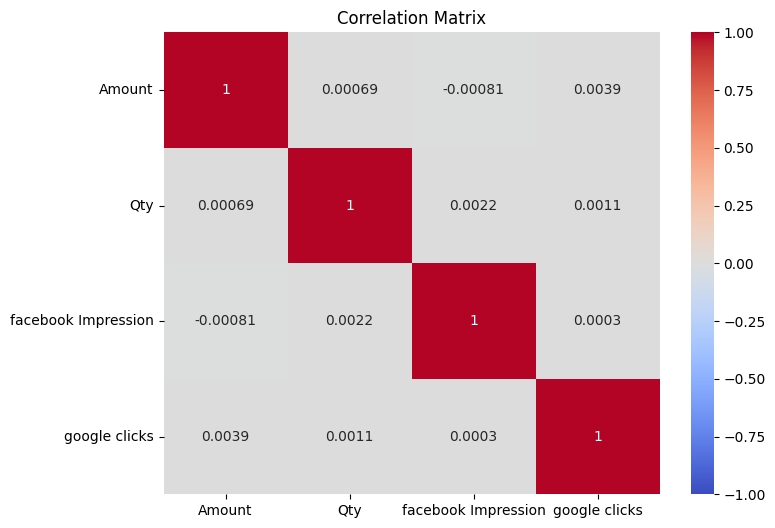

In [48]:
# Correlation matrix
corr_matrix = df[['Amount', 'Qty', 'facebook Impression', 'google clicks']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


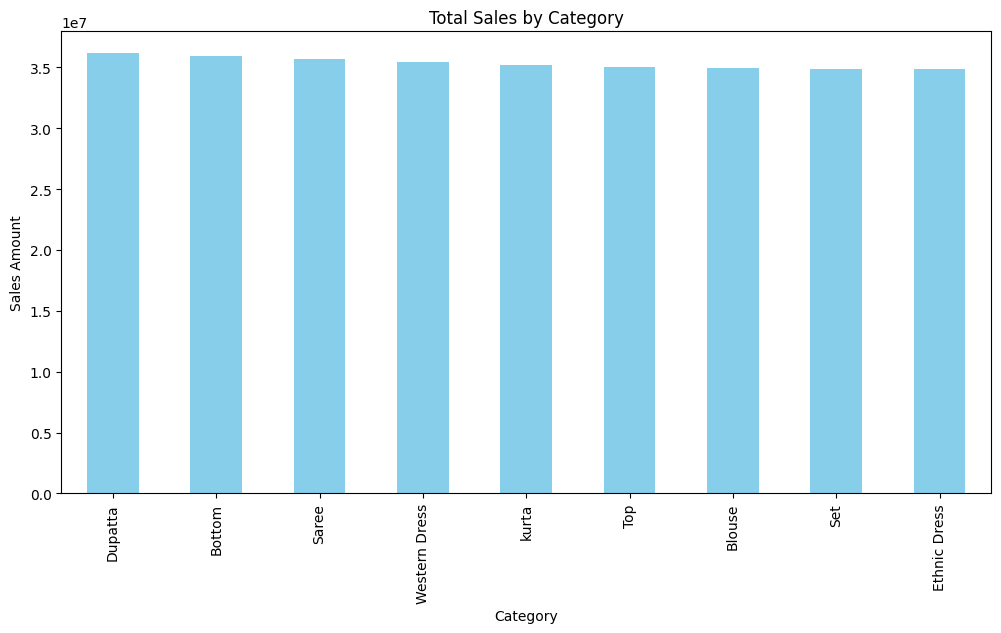

In [49]:
# Total sales by category
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.show()


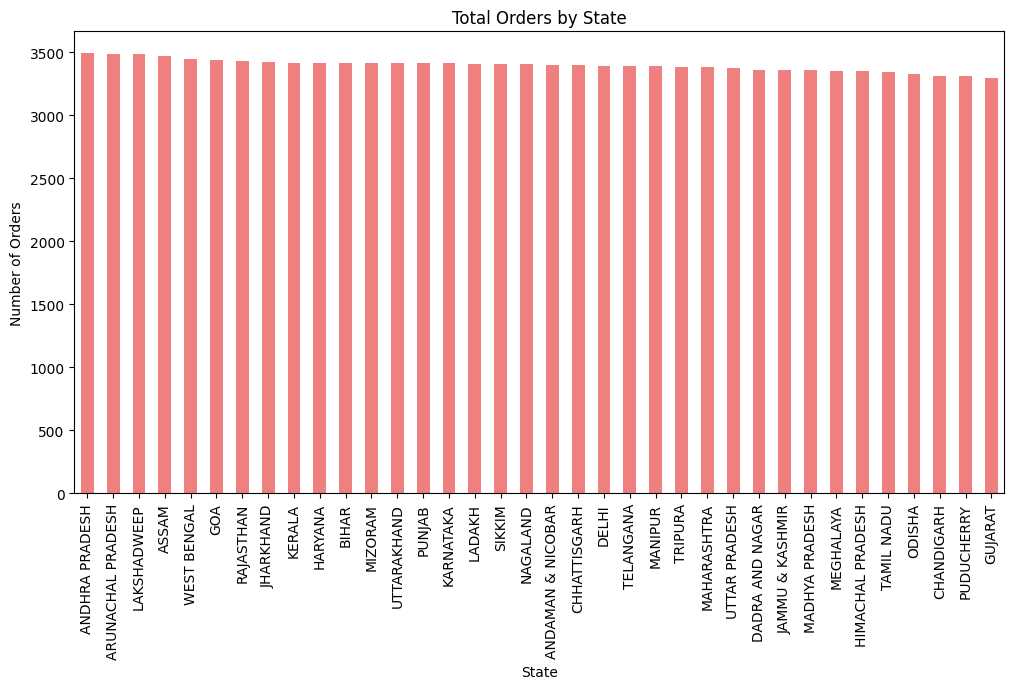

In [50]:
# Total orders by state
state_orders = df['ship-state'].value_counts()

plt.figure(figsize=(12, 6))
state_orders.plot(kind='bar', color='lightcoral')
plt.title('Total Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.show()


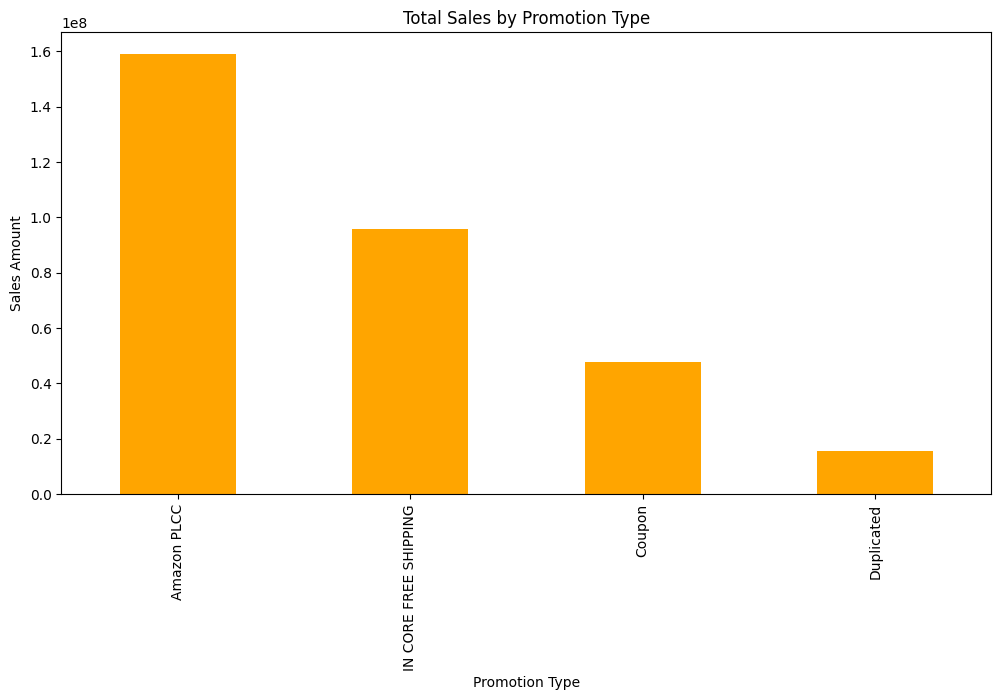

In [51]:
# Total sales by promotion type
promotion_sales = df.groupby('promotion-ids')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
promotion_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Sales Amount')
plt.show()


In [52]:
top_states = df.groupby('ship-state')['Amount'].sum().nlargest(5).index

df['High_Performing_State'] = df['ship-state'].apply(lambda x: 'Yes' if x in top_states else 'No')

print(df[['ship-state', 'High_Performing_State']].head())


          ship-state High_Performing_State
0              DELHI                    No
1        WEST BENGAL                   Yes
2      UTTAR PRADESH                    No
3            MIZORAM                    No
4  ARUNACHAL PRADESH                   Yes


In [53]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

missing_values = df['Date'].isna().sum()
print("\nMissing Dates:", missing_values)

df.dropna(subset=['Date'], inplace=True)

df.set_index('Date', inplace=True)

df_daily = df['Amount'].resample('D').sum()

print(df_daily.head())



Missing Dates: 0
Date
2016-01-01     95679.61
2016-01-02    114097.08
2016-01-03    111440.84
2016-01-04    113087.91
2016-01-05     91026.77
Freq: D, Name: Amount, dtype: float64


In [54]:
df.shape

(122331, 13)

In [55]:
df.head()
df.tail()

,Status,Fulfilment,ship-service-level,SKU,Category,Size,Qty,Amount,ship-state,promotion-ids,facebook Impression,google clicks,High_Performing_State
Date,,,,,,,,,,,,,
2024-04-26,delivered,amazon,Standard,SKU-1043,Western Dress,XXL,6,2286.63,MIZORAM,Amazon PLCC,285,369,No
2024-04-26,delivered,amazon,Standard,SKU-0209,Ethnic Dress,S,9,2590.42,SIKKIM,Amazon PLCC,952,57,No
2024-04-26,delivered,amazon,Standard,SKU-6367,Top,XS,3,987.52,SIKKIM,Amazon PLCC,934,413,No
2024-04-26,returned,merchant,Standard,SKU-2608,Western Dress,6XL,2,1979.25,CHHATTISGARH,Coupon,357,156,No
2024-04-26,delivered,amazon,Standard,SKU-8337,Saree,M,1,2315.79,LAKSHADWEEP,Duplicated,803,52,No


In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense, Flatten
import numpy as np

def create_lagged_features(df, n_lags=7):
    for col in ['Amount', 'Qty', 'facebook Impression', 'google clicks']:
        for lag in range(1, n_lags+1):
            df[f"{col}_lag{lag}"] = df[col].shift(lag)
    df.dropna(inplace=True)
    return df

df = create_lagged_features(df)

le_category = LabelEncoder()
df['Category'] = le_category.fit_transform(df['Category'])

le_size = LabelEncoder()
df['Size'] = le_size.fit_transform(df['Size'])

le_state = LabelEncoder()
df['ship-state'] = le_state.fit_transform(df['ship-state'])

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Amount', 'Qty', 'facebook Impression', 'google clicks']])

# Prepare target variables
target_category = df['Category']
target_size = df['Size']
target_qty = df['Qty']
target_ship_state = df['ship-state']


In [57]:
df.head()


,Status,Fulfilment,ship-service-level,SKU,Category,Size,Qty,Amount,ship-state,promotion-ids,...,facebook Impression_lag5,facebook Impression_lag6,facebook Impression_lag7,google clicks_lag1,google clicks_lag2,google clicks_lag3,google clicks_lag4,google clicks_lag5,google clicks_lag6,google clicks_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,delivered,amazon,Standard,SKU-3275,1,6,3,2424.41,1,Coupon,...,525.0,199.0,474.0,215.0,22.0,172.0,374.0,232.0,220.0,159.0
2016-01-01,returned,amazon,Standard,SKU-6023,2,6,10,1626.27,25,Amazon PLCC,...,40.0,525.0,199.0,461.0,215.0,22.0,172.0,374.0,232.0,220.0
2016-01-01,delivered,amazon,Standard,SKU-3921,2,10,7,2818.81,1,Amazon PLCC,...,584.0,40.0,525.0,456.0,461.0,215.0,22.0,172.0,374.0,232.0
2016-01-01,delivered,merchant,Standard,SKU-8518,4,5,3,1505.92,25,Amazon PLCC,...,202.0,584.0,40.0,123.0,456.0,461.0,215.0,22.0,172.0,374.0
2016-01-01,delivered,amazon,Expedited,SKU-8117,4,4,9,1759.27,27,Amazon PLCC,...,310.0,202.0,584.0,396.0,123.0,456.0,461.0,215.0,22.0,172.0


In [60]:
timesteps = 7
features = 4


train_size = int(0.8 * len(scaled_features))
X_train, X_test = scaled_features[:train_size], scaled_features[train_size:]
y_train, y_test = target_qty[:train_size], target_qty[train_size:]


total_samples = X_train.shape[0]


if total_samples % (timesteps * features) != 0:

    trimmed_samples = (total_samples // (timesteps * features)) * (timesteps * features)
    X_train = X_train[:trimmed_samples]
    X_test = X_test[:trimmed_samples]


X_train_rnn_lstm = X_train.reshape(-1, timesteps, features)
X_test_rnn_lstm = X_test.reshape(-1, timesteps, features)



X_train_convlstm = X_train.reshape(-1, timesteps, 1, 1, features)
X_test_convlstm = X_test.reshape(-1, timesteps, 1, 1, features)


In [63]:
print(f"Shape of X_train_rnn_lstm: {X_train_rnn_lstm.shape}")
print(f"Shape of y_train: {y_train.shape}")
y_train = y_train[:X_train_rnn_lstm.shape[0]]


Shape of X_train_rnn_lstm: (13976, 7, 4)
Shape of y_train: (97859,)


In [64]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense


timesteps = 7
features = 4

total_samples = X_train.shape[0]
trimmed_samples = (total_samples // (timesteps * features)) * (timesteps * features)
X_train = X_train[:trimmed_samples]
y_train = y_train[:trimmed_samples]

X_train_rnn_lstm = X_train.reshape(-1, timesteps, features)

model_rnn = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(timesteps, features)),
    Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mse')


model_rnn.fit(X_train_rnn_lstm, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 16.7094
Epoch 2/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5358
Epoch 3/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5618
Epoch 4/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.5166
Epoch 5/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3852
Epoch 6/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2569
Epoch 7/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.3173
Epoch 8/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.3411
Epoch 9/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.1935
Epoch 10/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2169
Epoch 11/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2647
Epoch 12/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.1447
Epoch 13/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2586
Epoch 14/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2064
Epoch 15/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - l

In [65]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(timesteps, features), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_rnn_lstm, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 16.6760
Epoch 2/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5079
Epoch 3/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.4466
Epoch 4/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.4034
Epoch 5/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8.3481
Epoch 6/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.2156
Epoch 7/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3063
Epoch 8/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2470
Epoch 9/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.3141
Epoch 10/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.1694
Epoch 11/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8.2285
Epoch 12/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.3171
Epoch 13/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2174
Epoch 14/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2115
Epoch 15/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - l

In [66]:
model_convlstm = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1, 1), activation='relu',
               input_shape=(timesteps, 1, 1, features), padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model_convlstm.compile(optimizer='adam', loss='mse')
model_convlstm.fit(X_train_convlstm, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 12.6622
Epoch 2/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 8.3145
Epoch 3/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.3956
Epoch 4/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.3502
Epoch 5/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.2556
Epoch 6/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.3926
Epoch 7/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.2686
Epoch 8/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.2467
Epoch 9/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8.4151
Epoch 10/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8.2259
Epoch 11/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.2097
Epoch 12/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.2615
Epoch 13/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8.2160
Epoch 14/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.2239
Epoch 15/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step -

In [68]:
y_test = y_test[:rnn_predictions.shape[0]]
X_test_rnn_lstm = X_test.reshape(-1, timesteps, features)


In [69]:
# RNN evaluation
rnn_predictions = model_rnn.predict(X_test_rnn_lstm)
y_test_rnn = y_test[:rnn_predictions.shape[0]]  # Align y_test
rnn_mse = np.mean((rnn_predictions.flatten() - y_test_rnn) ** 2)
print(f"RNN MSE: {rnn_mse}")

# LSTM evaluation
lstm_predictions = model_lstm.predict(X_test_rnn_lstm)
y_test_lstm = y_test[:lstm_predictions.shape[0]]  # Align y_test
lstm_mse = np.mean((lstm_predictions.flatten() - y_test_lstm) ** 2)
print(f"LSTM MSE: {lstm_mse}")

# ConvLSTM evaluation
convlstm_predictions = model_convlstm.predict(X_test_convlstm)
y_test_convlstm = y_test[:convlstm_predictions.shape[0]]  # Align y_test
convlstm_mse = np.mean((convlstm_predictions.flatten() - y_test_convlstm) ** 2)
print(f"ConvLSTM MSE: {convlstm_mse}")


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RNN MSE: 8.743481230019029
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
LSTM MSE: 8.933160247040165
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
ConvLSTM MSE: 10.35338698893296


In [70]:
from sklearn.metrics import mean_squared_error
import numpy as np


def evaluate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mape


rnn_rmse, rnn_mape = evaluate_metrics(y_test_rnn, rnn_predictions.flatten())
print(f"RNN RMSE: {rnn_rmse}, RNN MAPE: {rnn_mape}%")


lstm_rmse, lstm_mape = evaluate_metrics(y_test_lstm, lstm_predictions.flatten())
print(f"LSTM RMSE: {lstm_rmse}, LSTM MAPE: {lstm_mape}%")


convlstm_rmse, convlstm_mape = evaluate_metrics(y_test_convlstm, convlstm_predictions.flatten())
print(f"ConvLSTM RMSE: {convlstm_rmse}, ConvLSTM MAPE: {convlstm_mape}%")


RNN RMSE: 2.9569378130118036, RNN MAPE: 90.18929441938566%
LSTM RMSE: 2.9888392808982163, LSTM MAPE: 95.04928345696695%
ConvLSTM RMSE: 3.217667942615111, ConvLSTM MAPE: 94.42558833422555%


In [71]:
from sklearn.metrics import r2_score


def calculate_accuracy(y_true, y_pred, threshold=10):

    percentage_errors = np.abs((y_true - y_pred) / y_true) * 100
    accurate_predictions = percentage_errors <= threshold
    accuracy = np.mean(accurate_predictions) * 100
    return accuracy


rnn_r2 = r2_score(y_test_rnn, rnn_predictions.flatten())
lstm_r2 = r2_score(y_test_lstm, lstm_predictions.flatten())
convlstm_r2 = r2_score(y_test_convlstm, convlstm_predictions.flatten())

rnn_accuracy = calculate_accuracy(y_test_rnn, rnn_predictions.flatten(), threshold=10)
lstm_accuracy = calculate_accuracy(y_test_lstm, lstm_predictions.flatten(), threshold=10)
convlstm_accuracy = calculate_accuracy(y_test_convlstm, convlstm_predictions.flatten(), threshold=10)


print(f"RNN R²: {rnn_r2}, RNN Accuracy (10% threshold): {rnn_accuracy}%")
print(f"LSTM R²: {lstm_r2}, LSTM Accuracy (10% threshold): {lstm_accuracy}%")
print(f"ConvLSTM R²: {convlstm_r2}, ConvLSTM Accuracy (10% threshold): {convlstm_accuracy}%")


RNN R²: -0.06787800788879395, RNN Accuracy (10% threshold): 10.128755364806867%
LSTM R²: -0.09104430675506592, LSTM Accuracy (10% threshold): 11.416309012875537%
ConvLSTM R²: -0.2645026445388794, ConvLSTM Accuracy (10% threshold): 10.557939914163091%


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [73]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout
from keras.optimizers import Adam

def build_rnn_model(units=64, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(SimpleRNN(units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model


In [74]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout
from keras.optimizers import Adam

def build_lstm_model(units=128, dropout_rate=0.3, recurrent_dropout=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]),
                   dropout=dropout_rate, recurrent_dropout=recurrent_dropout))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model


In [75]:
from keras.models import Sequential
from keras.layers import ConvLSTM2D, BatchNormalization, Dropout
from keras.optimizers import Adam

def build_convlstm_model(filters=64, kernel_size=(3, 3), dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(ConvLSTM2D(filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model


In [76]:
from keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5)


In [106]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN


def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

if isinstance(y_train, pd.Series):
    y_train = y_train.values

kf = KFold(n_splits=5, shuffle=True)

for train_index, val_index in kf.split(X_train_scaled):
    X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    model = create_rnn_model((X_train_cv.shape[1], 1))


    model.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=1)


    val_loss = model.evaluate(X_val_cv, y_val_cv)
    print(f"Validation Loss: {val_loss}")


Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 14.5409
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3256
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3013
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3262
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2490
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3248
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2445
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2870
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3103
Epoch 10/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3243
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2405
Validation Loss: 8.203825950622559
Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13.8078
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1895
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1737
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━

In [105]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

if isinstance(y_train, pd.Series):
    y_train = y_train.values

kf = KFold(n_splits=5, shuffle=True)

for train_index, val_index in kf.split(X_train_scaled):
    X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]


    model = create_lstm_model((X_train_cv.shape[1], 1))


    model.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=1)


    val_loss = model.evaluate(X_val_cv, y_val_cv)
    print(f"Validation Loss: {val_loss**(1/3)}")


Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 19.3865
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 8.3302
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.1639
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.2946
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8.2489
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 8.2078
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.1935
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.2128
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.2589
Epoch 10/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.3555
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5309
Validation Loss: 2.0308960644414777
Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 21.2024
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8.3805
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 8.2478
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━

In [104]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Dense


def create_convlstm_model(input_shape):
    model = Sequential()
    model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

if isinstance(y_train, pd.Series):
    y_train = y_train.values

kf = KFold(n_splits=5, shuffle=True)

for train_index, val_index in kf.split(X_train_scaled):
    X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    X_train_cv = X_train_cv.reshape((X_train_cv.shape[0], X_train_cv.shape[1], 1, 1, 1))
    X_val_cv = X_val_cv.reshape((X_val_cv.shape[0], X_val_cv.shape[1], 1, 1, 1))


    model = create_convlstm_model((X_train_cv.shape[1], 1, 1, 1))


    model.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=1)


    val_loss = model.evaluate(X_val_cv, y_val_cv)
    print(f"Validation Loss: {val_loss**(1/3)}")


Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 28.6898
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2151
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.0440
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2349
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.1715
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2519
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.1662
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.1312
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.2561
Epoch 10/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3452
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.1284
Validation Loss: 2.0219345848500887
Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 28.1252
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8.4449
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.2627
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━